#### IE 7275 - Assignment 4 - Classification model

In [1]:
from datetime import date
studentName="Qi Li"
studentEmail="li.qi8@northeastern.edu"
homework=4
contributedPercentage=100
print("IE 7275: Data mining in Engineering")
print("\n"*15)
print(f'Homework - {homework}')
print(f'Student name : {studentName}')
print(f'Student Email : {studentEmail}')
print("\n"*15)
print(f'Percentage of Effort Contributed by Student : {contributedPercentage}%')
print(f'Submission Date: {date.today()}')

IE 7275: Data mining in Engineering
















Homework - 4
Student name : Qi Li
Student Email : li.qi8@northeastern.edu
















Percentage of Effort Contributed by Student : 100%
Submission Date: 2023-04-05


## Import packages

In [32]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import pylab
sns.set()
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import load_data
import graphviz
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score,regressionSummary
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import statsmodels.api as sm
import scikitplot as skplt
from scikitplot.metrics import plot_lift_curve
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Problem 1

Dataset - <A href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer">Breast Cancer</A>

a) Create a binary classification model using Knn and naive bayes model and classify the patient breast cancer for irradiat 

b) Perform EDA, feature selection before design the model

c) Show all the classification performance metrics and explain each of the performance metrics

Display the lift curve and explain your findings

### 1.EDA

In [122]:
# load data
df1 = pd.read_csv('/Users/liqi/Desktop/IE7275/homework/hw4/Breast Cancer Dataset/data.csv', 
                 names=['class', 'age', 'menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])
# List the first 5 records
df1.head()
# Show the dimention of dataset
df1.info()
# Show the shape of dataset
df1.shape

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


(286, 10)

In [123]:
# show the dimensions
print("Dimensions: ", df1.shape, "\n")

# check the columns
print(df1.columns, "\n")

Dimensions:  (286, 10) 

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object') 



In [124]:
# check the missing values
print(df1.isnull().sum())

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


we can see from above there is no missing values in this dataset

In [125]:
# check the duplicate data
df1[df1.duplicated()]
df1.duplicated().sum()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
21,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
78,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
91,no-recurrence-events,50-59,ge40,20-24,0-2,no,3,left,left_up,no
97,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
111,no-recurrence-events,50-59,ge40,15-19,0-2,no,1,right,central,no
112,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
113,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,left_up,no
120,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
142,no-recurrence-events,60-69,ge40,10-14,0-2,no,1,left,left_up,no
171,no-recurrence-events,30-39,premeno,15-19,0-2,no,1,left,left_low,no


14

In [126]:
# remove the duplicate data
df1 = df1.drop_duplicates()
df1

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [127]:
# check the datatype of particular column
df1['node-caps'].unique().tolist()
df1['breast-quad'].unique().tolist()

['no', 'yes', '?']

['left_low', 'right_up', 'left_up', 'right_low', 'central', '?']

In [128]:
# check the number of rows that contains '?'
df1['node-caps'].value_counts()['?']
df1['breast-quad'].value_counts()['?']

8

1

we can see there are only 8 rows in column 'node-caps' and 1 row in column 'breast-quad' containing '?', so we can drop these rows

In [129]:
df1 = df1.replace('?', np.nan)
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        263 non-null    object
 1   age          263 non-null    object
 2   menopause    263 non-null    object
 3   tumor-size   263 non-null    object
 4   inv-nodes    263 non-null    object
 5   node-caps    263 non-null    object
 6   deg-malig    263 non-null    int64 
 7   breast       263 non-null    object
 8   breast-quad  263 non-null    object
 9   irradiat     263 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.6+ KB


(array([ 1.,  0., 34.,  0., 86.,  0., 86.,  0., 51.,  5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

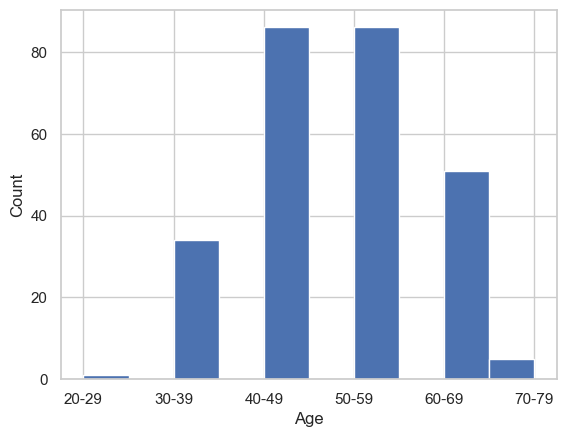

(array([ 8., 26., 25., 45., 48., 57., 18., 21.,  3., 12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Tumor Size')

Text(0, 0.5, 'Count')

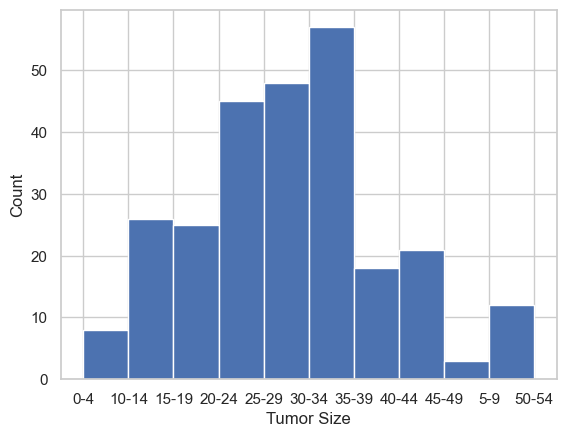

In [130]:
# Check the distribution of some variable using histograms

#resort the dataframe by age and tumor size
df11 = df1.sort_values(by='age', ascending=True)
df12 = df1.sort_values(by='tumor-size', ascending=True)

# create histogram of age and tumor size
plt.hist(df11['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.hist(df12['tumor-size'])
plt.xlabel('Tumor Size')
plt.ylabel('Count')
plt.show()

We can see from above plots that the age of person who got a Breast Cancer is normally between 30 to 69, and the tumor size is normally between 10-39.

### 2. Feature selection

In [131]:
# check the unique value of each column
df1['class'].unique().tolist()
df1['age'].unique().tolist()
df1['menopause'].unique().tolist()
df1['tumor-size'].unique().tolist()
df1['inv-nodes'].unique().tolist()
df1['node-caps'].unique().tolist()
df1['breast'].unique().tolist()
df1['breast-quad'].unique().tolist()
df1['irradiat'].unique().tolist()

['no-recurrence-events', 'recurrence-events']

['30-39', '40-49', '60-69', '50-59', '70-79', '20-29']

['premeno', 'ge40', 'lt40']

['30-34',
 '20-24',
 '15-19',
 '0-4',
 '25-29',
 '50-54',
 '10-14',
 '40-44',
 '35-39',
 '5-9',
 '45-49']

['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26']

['no', 'yes']

['left', 'right']

['left_low', 'right_up', 'left_up', 'right_low', 'central']

['no', 'yes']

In [132]:
#use number to replace the letters and range
df1['class'] = df1['class'].replace(['no-recurrence-events', 'recurrence-events'], [1, 2])
df1['age'] = df1['age'].replace(['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], [1, 2, 3, 4, 5, 6])
df1['menopause'] = df1['menopause'].replace(['ge40', 'premeno', 'lt40'], [1, 2, 3])
df1['tumor-size'] = df1['tumor-size'].replace(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29','30-34','35-39','40-44','45-49','50-54'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
df1['inv-nodes'] = df1['inv-nodes'].replace(['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'], [1, 2, 3, 4, 5, 6, 7])
df1['node-caps'] = df1['node-caps'].replace(['no', 'yes', '?'],[1, 2, 3])
df1['breast'] = df1['breast'].replace(['left', 'right'],[1, 2])
df1['breast-quad'] = df1['breast-quad'].replace(['right_low', 'central', 'left_low', 'left_up', 'right_up', '?'],[1, 2, 3, 4, 5, 6])
df1['irradiat'] = df1['irradiat'].replace(['no', 'yes'],[1, 2])

df1.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,2,2,7,1,1,3,1,3,1
1,1,3,2,5,1,1,2,2,5,1
2,1,3,2,5,1,1,2,1,3,1
3,1,5,1,4,1,1,2,2,4,1
4,1,3,2,1,1,1,2,2,1,1


,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
class,1.000000,-0.073761,0.007838,0.164378,0.296408,0.285544,0.318993,-0.036495,0.058880,0.220559
age,-0.073761,1.000000,-0.643350,0.009397,-0.077059,-0.045694,-0.059384,-0.035063,0.045060,-0.078095
menopause,0.007838,-0.643350,1.000000,-0.026280,-0.019451,0.003749,-0.053264,0.037269,0.011519,0.046575
tumor-size,0.164378,0.009397,-0.026280,1.000000,0.159118,0.189347,0.181859,0.060873,0.264010,0.150822
inv-nodes,0.296408,-0.077059,-0.019451,0.159118,1.000000,0.619758,0.342247,-0.008137,-0.011697,0.280807
node-caps,0.285544,-0.045694,0.003749,0.189347,0.619758,1.000000,0.324815,-0.010458,0.042057,0.315511
deg-malig,0.318993,-0.059384,-0.053264,0.181859,0.342247,0.324815,1.000000,-0.038675,0.078613,0.221067
breast,-0.036495,-0.035063,0.037269,0.060873,-0.008137,-0.010458,-0.038675,1.000000,0.284789,0.027830
breast-quad,0.058880,0.045060,0.011519,0.264010,-0.011697,0.042057,0.078613,0.284789,1.000000,0.006925
irradiat,0.220559,-0.078095,0.046575,0.150822,0.280807,0.315511,0.221067,0.027830,0.006925,1.000000


<Figure size 1000x700 with 0 Axes>

<AxesSubplot: >

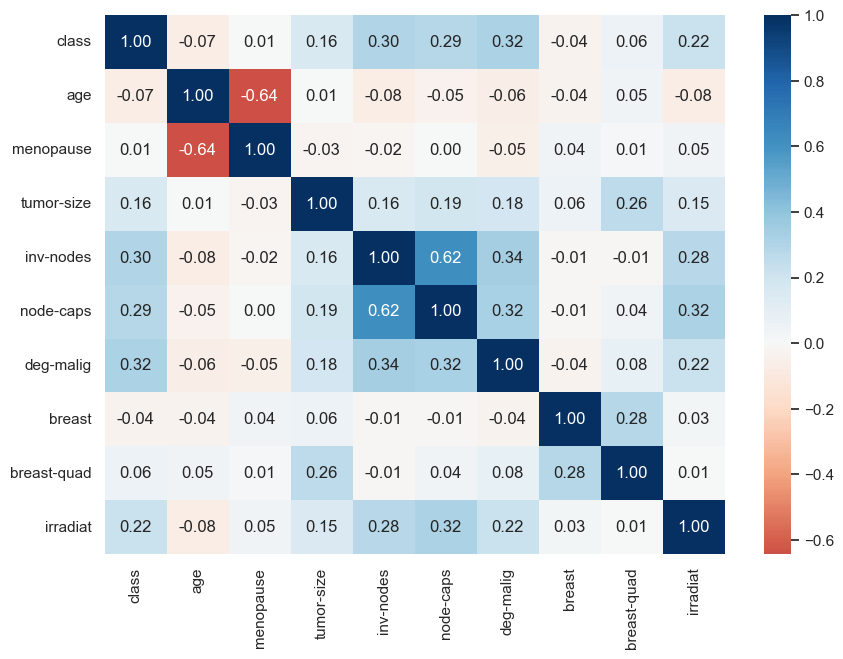

In [133]:
# 1. Correlation analysis: check for any correlations between variables using a correlation matrix and heat map
corr = df1.corr()
display(corr)
plt.figure(figsize = (10,7))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, 
            fmt = ".2f", cmap = "RdBu", center = 0)

We can see from the above figure that menopause and age have a correlation at 0.63, since menopause typically occurs at a certain age range. Also, node-caps and inv-nodes have a correlation at 0.57, but other attributes seem do not have strong correlations.

In [134]:
# 2. Backward selection
# define X and y
X = df1.drop('class', 1)
y = df1['class']
y.reset_index(drop = True, inplace = True)

# standardize the predicators
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(data=scaled_X,columns=X.columns)

# split the dataset into taining dataset and validation dataset
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=1)

In [135]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, selected_features_backward = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

Variables: age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat
Start: score=193.93
Step: score=191.95, remove menopause
Step: score=190.00, remove inv-nodes
Step: score=188.53, remove irradiat
Step: score=187.60, remove breast
Step: score=186.62, remove breast-quad
Step: score=186.62, remove None


In [136]:
selected_features_backward

['age', 'tumor-size', 'node-caps', 'deg-malig']

We can see by using Backward selection, features 'age', 'tumor-size', 'inv-nodes', 'deg-malig' were selected to predict the tumor class.

In [137]:
# 3.Forward selection

selected_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

for feature in X.columns:
    selected_features.append(feature)
    f_values, _ = f_regression(X[selected_features], y)
    print(feature, f_values[-1])

age 1.4278008701010654
menopause 0.016037141516204136
tumor-size 7.248115627287324
inv-nodes 25.13959441948403
node-caps 23.169840971493034
deg-malig 29.567190845960315
breast 0.3480942292981833
breast-quad 0.9079863370411286
irradiat 13.345931483648284


In [138]:
best_feature = X.columns[np.argmax(f_values)]
print(best_feature)

deg-malig


We can see by using Forward selection, feature deg-malig was selected as the best feature to predict the tumor class.

### 4. Knn and naive bayes

In [139]:
# reload the dataset
df_1 = pd.read_csv('/Users/liqi/Desktop/IE7275/homework/hw4/Breast Cancer Dataset/data.csv', 
                 names=['class', 'age', 'menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])

In [140]:
# Preprocess the data
label_encoder = LabelEncoder()
df_1['class'] = label_encoder.fit_transform(df_1['class'])
df_1['age'] = df_1['age'].apply(lambda x: int(x.split('-')[0]))
df_1['tumor-size'] = df_1['tumor-size'].apply(lambda x: int(x.split('-')[0]))
df_1['inv-nodes'] = df_1['inv-nodes'].apply(lambda x: int(x.split('-')[0]))
df_1['irradiat'] = label_encoder.fit_transform(df_1['irradiat'])
df_1 = pd.get_dummies(df_1, columns=['menopause', 'node-caps', 'breast', 'breast-quad'])

In [141]:
# Split the data into training and testing datasets
X = df_1.drop('irradiat', axis=1)
y = df_1['irradiat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Train and evaluate KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy of KNN model:', accuracy_knn)

KNeighborsClassifier()

Accuracy of KNN model: 0.6896551724137931


In [143]:
# Train and evaluate Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy of Naive Bayes model:', accuracy_nb)

GaussianNB()

Accuracy of Naive Bayes model: 0.39655172413793105


In [144]:
# Use the best model to predict the patient breast cancer for irradiat
if accuracy_knn > accuracy_nb:
    print('Use KNN model to predict')
    patient_data = [[40, 1, 20, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]
    prediction = knn.predict(patient_data)
else:
    print('Use Naive Bayes model to predict')
    patient_data = [[40, 1, 20, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]
    prediction = nb.predict(patient_data)
    
if prediction[0] == 0:
    print('The patient does not need irradiation.')
else:
    print('The patient needs irradiation.')

Use KNN model to predict
The patient needs irradiation.


### 5. Evaluation: use Accuracy Precision, Recall, F1-Score, Confusion Matrix

In [145]:
#KNN
accuracy1 = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy1)

Accuracy: 0.6896551724137931


In [146]:
precision1 = precision_score(y_test, y_pred_knn)
print("Precision", precision1)

Precision 0.3333333333333333


In [147]:
recall1 = recall_score(y_test, y_pred_knn)
print('Recall:', recall1)

Recall: 0.058823529411764705


In [148]:
f1 = f1_score(y_test, y_pred_knn)
print('F1-Score:', f1)

F1-Score: 0.1


In [149]:
cm1 = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:\n', cm1)

Confusion Matrix:
 [[39  2]
 [16  1]]


We can see from above that the model's accuracy of evaluation metric is 0.69. However, the precision is only 0.33. The recall is 0.05 and the F1-score is 0.1. So, the knn model is not very good, as it has low precision and recall values.

In [150]:
# Naive bayes
accuracy2 = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy2)

Accuracy: 0.39655172413793105


In [151]:
precision2 = precision_score(y_test, y_pred_nb)
print("Precision", precision2)

Precision 0.32


In [152]:
recall2 = recall_score(y_test, y_pred_nb)
print('Recall:', recall2)

Recall: 0.9411764705882353


In [153]:
f2 = f1_score(y_test, y_pred_nb)
print('F1-Score:', f2)

F1-Score: 0.4776119402985075


In [154]:
cm2 = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:\n', cm2)

Confusion Matrix:
 [[ 7 34]
 [ 1 16]]


We can see from above analysis that the accuracy of naive bayes is 0.39, the precision naive bayes is only 0.32. The recall score is 0.94, which means only 94% of them were correctly identified by the model. Therefore, the performance of naive bayes is even wore than KNN.

### 5. Lift curve

Text(0.5, 1.0, 'KNN Lift Curve')

Text(0.5, 0, 'Percentage of sample')

Text(0, 0.5, 'Lift')

Text(0.5, 1.0, 'Naive Bayes Lift Curve')

Text(0.5, 0, 'Percentage of sample')

Text(0, 0.5, 'Lift')

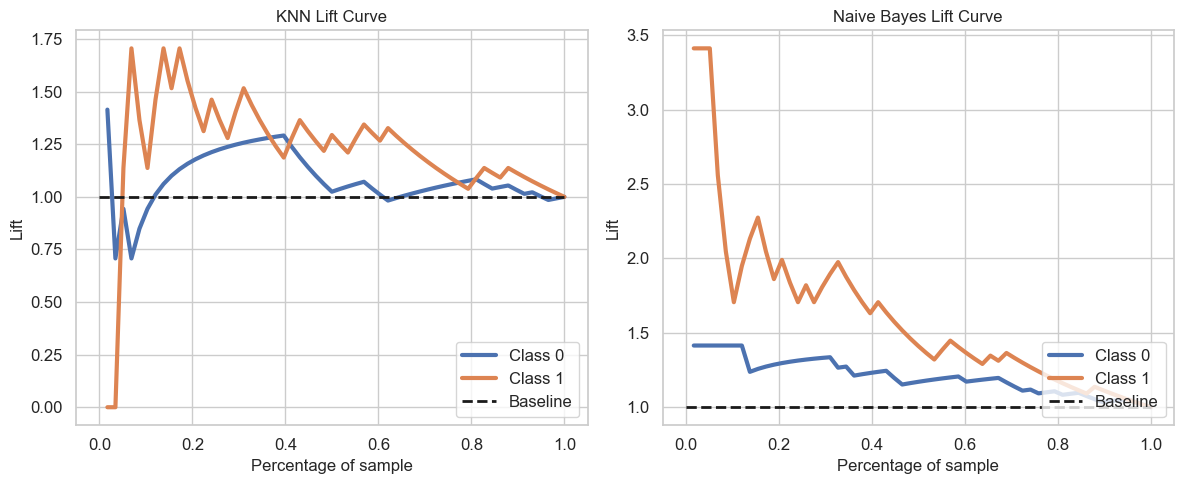

In [158]:
y_prob_knn = knn.predict_proba(X_test)
y_prob_nb = nb.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# KNN model
disp = plot_lift_curve(y_test, y_prob_knn, ax=ax1)
ax1.set_title('KNN Lift Curve')
ax1.set_xlabel('Percentage of sample')
ax1.set_ylabel('Lift')

# Naive Bayes model
disp = plot_lift_curve(y_test, y_prob_nb, ax=ax2)
ax2.set_title('Naive Bayes Lift Curve')
ax2.set_xlabel('Percentage of sample')
ax2.set_ylabel('Lift')

plt.tight_layout()
plt.show()

We can see from above plots that knn performs better than naive bayes.

# Problem 2

Dataset - <a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease">Heart Disease</a>

a) Create a binary classification model using Decision Tree, Ensemble methods and Neural Network model and classify the patient heart disease probability

b) Perform EDA, feature selection before design the model

c) Show all the classification performance metrics and explain each of the performance metrics

Display the lift curve and explain your findings

### 1. EDA

In [96]:
# Load the dataset
df2 = pd.read_csv('/Users/liqi/Desktop/IE7275/homework/hw4/Heart Disease/cleveland_data.csv', 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
# List the first 5 records
df2.head()
# Show the dimention of dataset
df2.info()
# Show the shape of dataset
df2.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


(303, 14)

In [97]:
# show the dimensions
print("Dimensions: ", df2.shape, "\n")

# check the columns
print(df2.columns, "\n")

Dimensions:  (303, 14) 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object') 



In [98]:
# check the missing values
print(df2.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


we can see from above there is no missing values in this dataset

In [99]:
# check duplicate data
df1[df1.duplicated()]
df1.duplicated().sum()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


0

In [100]:
# combine 1-4 as 0-1 in the num column
NUM = {0:0, 1:1, 2:1, 3:1, 4:1}
df2['num'] = df2['num'].apply(lambda x : NUM[x])
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(array([ 1., 10., 33., 38., 37., 60., 64., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

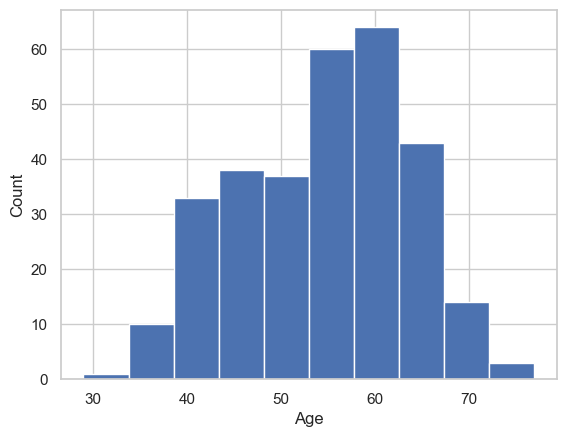

(array([10., 42., 67., 74., 56., 27., 14.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'trestbps')

Text(0, 0.5, 'Count')

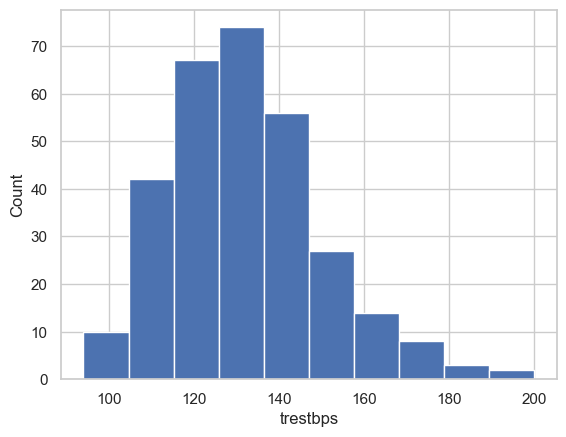

(array([ 1.,  6., 11., 26., 35., 53., 78., 62., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'thalach')

Text(0, 0.5, 'Count')

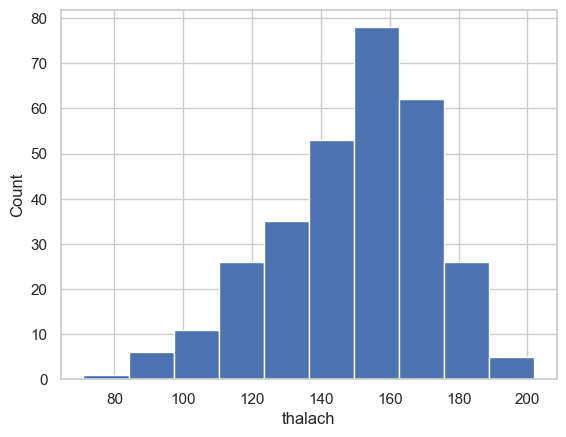

In [101]:
# Check the distribution of some variable using histograms

#resort the dataframe by age and tumor size
#df1 = df.sort_values(by='age', ascending=True)
#df2 = df.sort_values(by='tumor-size', ascending=True)

# create histogram of age and tumor size
plt.hist(df2['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.hist(df2['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.show()

plt.hist(df2['thalach'])
plt.xlabel('thalach')
plt.ylabel('Count')
plt.show()

We can see from above plots that these attributes almost formed normal distribution

In [102]:
# check the datatype of particular column
df2['ca'].unique().tolist()
df2['thal'].unique().tolist()

['0.0', '3.0', '2.0', '1.0', '?']

['6.0', '3.0', '7.0', '?']

In [103]:
# check the number of rows that contains '?'
df2['ca'].value_counts()['?']
df2['thal'].value_counts()['?']

4

2

 we can see there are only 4 rows in column 'ca' and 2 rows in column 'thal' containing '?', so we can drop these rows

In [104]:
# drop the rows with '?'
df2 = df2[df2['ca'] != '?'].reset_index(drop=True)
df2 = df2[df2['thal'] != '?'].reset_index(drop=True)
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='trestbps', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of trestbps')

Text(0.5, 0, 'trestbps')

Text(0, 0.5, 'Frequency')

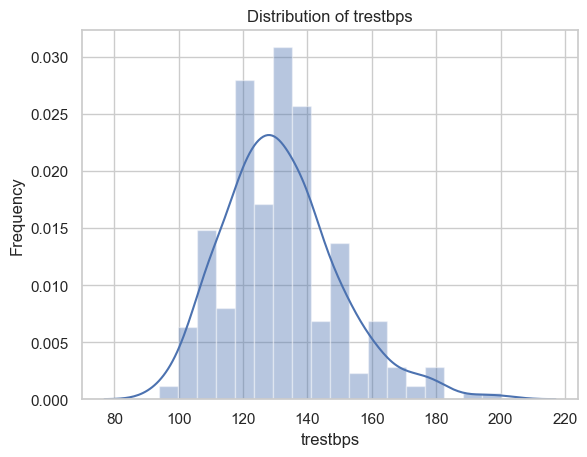

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='chol', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of chol')

Text(0.5, 0, 'chol')

Text(0, 0.5, 'Frequency')

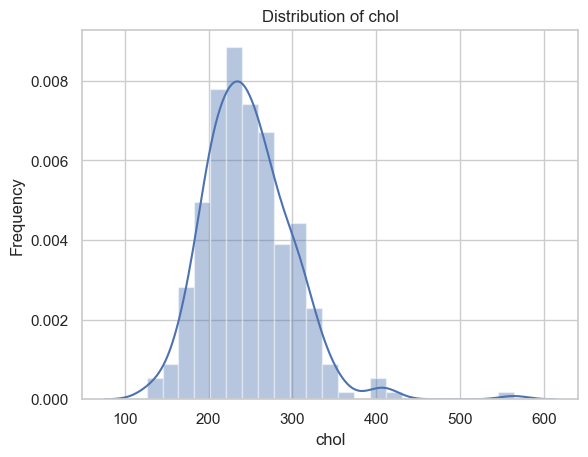

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='thalach', ylabel='Density'>

Text(0.5, 1.0, 'Distribution of thalach')

Text(0.5, 0, 'thalach')

Text(0, 0.5, 'Frequency')

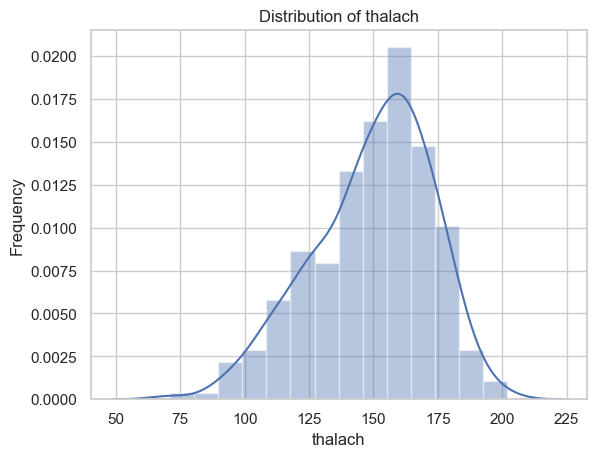

In [105]:
# show the distribution of varibles in plot:
sns.set_theme(style="whitegrid")
for col in ['trestbps','chol','thalach',]:
    plt.figure()
    sns.distplot(df2[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


We can see from above plots that attributes like trestbps, chol, thalach almost formed normal distribution

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='trestbps'>

Text(0.5, 1.0, 'Boxplot of trestbps')

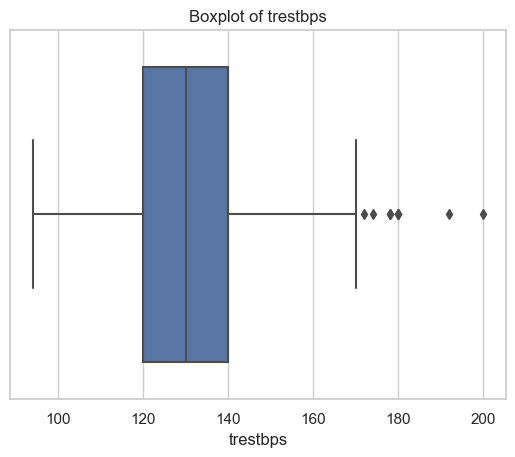

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='chol'>

Text(0.5, 1.0, 'Boxplot of chol')

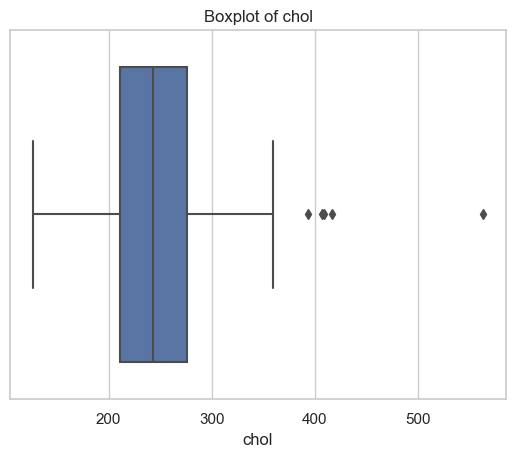

<Figure size 640x480 with 0 Axes>

<AxesSubplot: xlabel='thalach'>

Text(0.5, 1.0, 'Boxplot of thalach')

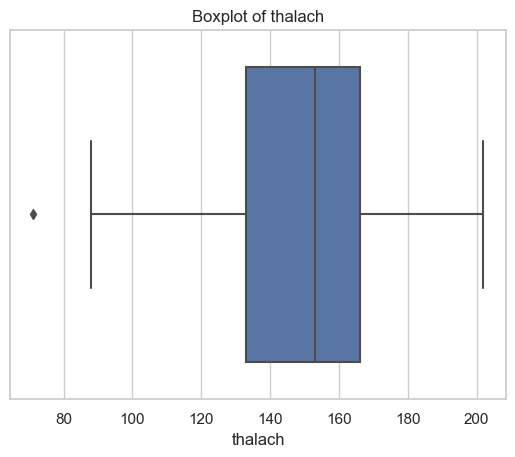

In [106]:
# use boxplot to find the outliers: 
sns.set_theme(style="whitegrid")
for col in ['trestbps','chol','thalach',]:
    plt.figure()
    sns.boxplot(x = df2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

We can see from the plot that there are not so many outliers, so it is OK to leave them instead of deleting them

### 2. Feature Selection

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.424052


<Figure size 1000x700 with 0 Axes>

<AxesSubplot: >

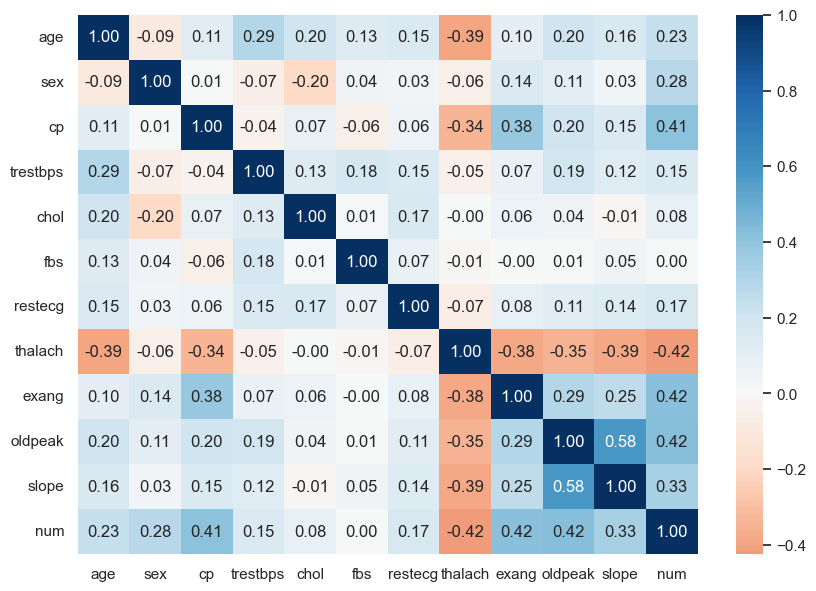

In [107]:
# 1. Correlation analysis: check for any correlations between variables using a correlation matrix and heat map
corr = df2.corr()
display(corr)
plt.figure(figsize = (10,7))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, 
            fmt = ".2f", cmap = "RdBu", center = 0)

We can see from the above figure that thalach seems to have pretty higher correlation with attributes such as exang, oldpeak, slope, age, cp and target. Also oldpeak has higher correlation with oldpeak and slope.

In [108]:
# 2. Backward selection
# define X and y
X = df2.drop('num', 1)
y = df2['num']
y.reset_index(drop = True, inplace = True)

# standardize the predicators
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(data=scaled_X,columns=X.columns)

# split the dataset into taining dataset and validation dataset
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4,random_state=1)

In [109]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, selected_features_backward = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

Variables: age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
Start: score=124.92
Step: score=123.12, remove slope
Step: score=121.52, remove age
Step: score=119.80, remove chol
Step: score=118.31, remove restecg
Step: score=118.31, remove None


In [110]:
selected_features_backward

['sex', 'cp', 'trestbps', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

We can see by using Backward selection, features 'sex', 'cp', 'restecg', 'oldpeak', 'slope', 'ca', 'thal' were selected to predict the ‘target’ variable.

In [111]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [112]:
# 3.Forward selection

selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for feature in X.columns:
    selected_features.append(feature)
    f_values, _ = f_regression(X[selected_features], y)
    print(feature, f_values[-1])

age 16.038096518272635
sex 24.798347484057288
cp 59.24191467710506
trestbps 7.117646427326161
chol 1.913799832904614
fbs 0.0029585288558576497
restecg 8.394986626328002
thalach 64.58985473897073
exang 63.680253347998956
oldpeak 64.6772084206361
slope 36.80429994812169
ca 80.57786588101055
thal 113.21931919375592


We can see by using Forward selection, feature ca was selected as the best feature to predict fiture target.

### 3. Binary Classification

#### Buila a Decision Tree

In [113]:
# Define the target variable and the features
target = df2['num']
features = df2.drop('num', axis = 1)

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 42)

# Decision Tree Classifier
classTree = DecisionTreeClassifier(max_depth = 5)
classTree.fit(X_train, y_train)
ydt_pred = classTree.predict(X_test)

DecisionTreeClassifier(max_depth=5)

#### Build a random forest model

In [114]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 77)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
yrf_pred = rfc.predict(X_test)

RandomForestClassifier(max_depth=5, random_state=77)

#### Build a neural network model

In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Create and train the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train, y_train)

ynn_pred = mlp.predict(X_test)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

### 4. Evaluation

In [116]:
#Evaluation for decision tree
print(f'Classification Report:\n{classification_report(y_test, ydt_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        60
           1       0.80      0.69      0.75        59

    accuracy                           0.76       119
   macro avg       0.77      0.76      0.76       119
weighted avg       0.77      0.76      0.76       119



The precision for predicting patients are 0.31 and 0.50 and the recall of the 

In [117]:
#Evaluation for random forest
print(f'Classification Report:\n{classification_report(y_test, yrf_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        60
           1       0.88      0.75      0.81        59

    accuracy                           0.82       119
   macro avg       0.83      0.82      0.82       119
weighted avg       0.83      0.82      0.82       119



In [118]:
# Evaluation for neural network
print(f'Classification Report:\n{classification_report(y_test, ynn_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        60
           1       0.00      0.00      0.00        59

    accuracy                           0.50       119
   macro avg       0.25      0.50      0.34       119
weighted avg       0.25      0.50      0.34       119



### 5. Lift curve

Text(0.5, 1.0, 'Decision tree Lift Curve')

Text(0.5, 0, 'Percentage of sample')

Text(0, 0.5, 'Lift')

Text(0.5, 1.0, 'Random forest Lift Curve')

Text(0.5, 0, 'Percentage of sample')

Text(0, 0.5, 'Lift')

Text(0.5, 1.0, 'Neural network Lift Curve')

Text(0.5, 0, 'Percentage of sample')

Text(0, 0.5, 'Lift')

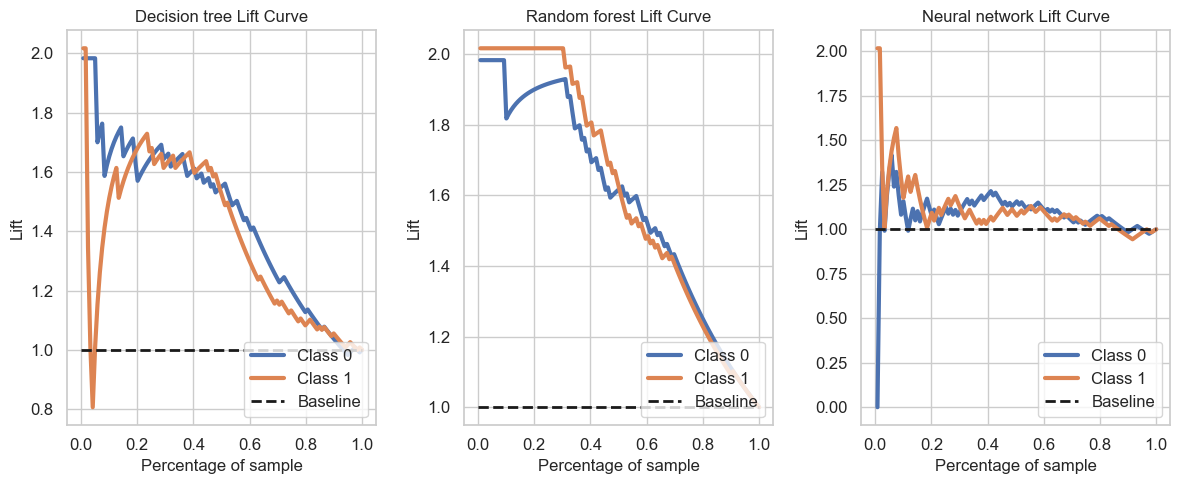

In [119]:
y_prob_dt = classTree.predict_proba(X_test)
y_prob_rf = rfc.predict_proba(X_test)
y_prob_nn = mlp.predict_proba(X_test)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# decision tree model
disp = plot_lift_curve(y_test, y_prob_dt, ax=ax1)
ax1.set_title('Decision tree Lift Curve')
ax1.set_xlabel('Percentage of sample')
ax1.set_ylabel('Lift')

# Random forest model
disp = plot_lift_curve(y_test, y_prob_rf, ax=ax2)
ax2.set_title('Random forest Lift Curve')
ax2.set_xlabel('Percentage of sample')
ax2.set_ylabel('Lift')

# Random forest model
disp = plot_lift_curve(y_test, y_prob_nn, ax=ax3)
ax3.set_title('Neural network Lift Curve')
ax3.set_xlabel('Percentage of sample')
ax3.set_ylabel('Lift')

plt.tight_layout()
plt.show()

We can see from the plots that random forest performs better than decision tree and neural network.

# Problem 3

## (a)Can you make a common pipeline for these two problems? How is the common pipeline should be for these two dataset? 

I write this part with the help of Ghatgpt: 

Problem 1: 

1.Data Preparation: Load the breast cancer dataset and import necessary libraries. 

2.Exploratory Data Analysis (EDA): Explore the dataset to gain insights into the data, including visualizations of the distributions of the features and the target variable, and identify any missing or outlier values. 

3.Feature Selection: Select relevant features that are likely to have the most impact on the target variable. 

4.Data Preprocessing: Prepare the data for the machine learning algorithms by scaling the features and splitting the dataset into training and testing sets. 

5.Model Training: Train the KNN and Naive Bayes classifiers on the training dataset. 

6.Model Evaluation: Evaluate the performance of the trained classifiers on the testing dataset using classification performance metrics such as accuracy, precision, recall, F1 score, and AUC-ROC curve. 

7.Lift Curve Analysis: Plot the lift curve and interpret the results.

Problem 2: 
    
1.Data Preparation: Load the heart disease dataset and import necessary libraries. 
    
2.Exploratory Data Analysis (EDA): Explore the dataset to gain insights into the data, including visualizations of the distributions of the features and the target variable, and identify any missing or outlier values. 

3.Feature Selection: Select relevant features that are likely to have the most impact on the target variable. 

4.Data Preprocessing: Prepare the data for the machine learning algorithms by scaling the features and splitting the dataset into training and testing sets. 

5.Model Training: Train the Decision Tree, Ensemble methods (Random Forest or Gradient Boosting), and Neural Network classifiers on the training dataset. 

6.Model Evaluation: Evaluate the performance of the trained classifiers on the testing dataset using classification performance metrics such as accuracy, precision, recall, F1 score, and AUC-ROC curve. 

7.Lift Curve Analysis: Plot the lift curve and interpret the results.


## (b)
How do you evaluate these datasets using your common pipeline?

choose a different dataset and use the common pipeline to test its accuracy


# Problem 4

## (a) How do you productionalize your common pipeline?


Data Preparation: The input data is thoroughly cleaned, formatted correctly, and made compatible with the machine learning pipeline.

Model Training: The machine learning model is trained with the prepared data, using cross-validation to ensure robustness and generalization to new data.

Pipeline Serialization: The machine learning pipeline is serialized using a tool such as joblib or pickle for easy saving and loading.

Deployment: The pipeline is deployed in a manner that best suits the use case, such as a REST API, a web application, or a container.

Monitoring: Once deployed, the pipeline is monitored closely to ensure that it performs as expected. Alerts and monitoring tools are set up to detect any issues or anomalies.

Updating: Over time, the pipeline may require updates to improve its performance or add new features. A process is put in place for updating and testing the pipeline to ensure that it continues to meet requirements.

Security: The pipeline is secured to protect it from unauthorized access and to comply with any relevant security and compliance regulations.



## (b)How can we perform the paramater tuning for this pipeline?

1.Define the hyperparameters: Identify the hyperparameters of the machine learning model and their possible values. Hyperparameters are parameters that are not learned from the data, but are set before training the model, such as learning rate, regularization strength, or the number of hidden units in a neural network.



2.Choose a search strategy: Choose a search strategy to find the best set of hyperparameters. There are various strategies available, such as grid search, randomized search, or Bayesian optimization.

3.Train and evaluate the model: Train the machine learning model with the training set using different sets of hyperparameters. Evaluate the model with the validation set and record the performance.

4.Select the best hyperparameters: Select the best set of hyperparameters based on the performance on the validation set.

5.Evaluate the final model: Train the final model using the selected hyperparameters on the entire training set, and evaluate its performance on the test set to ensure it can generalize to new data.

6.Refine the hyperparameters: If the performance of the final model is not satisfactory, refine the hyperparameters and repeat steps 3 to 5 until the desired performance is achieved.